In [18]:
# import all neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr
import plotly.express as px
import statsmodels.api as sm



In [2]:
# import a dataset
df=pd.read_csv("WorldHappiness_Corruption_2015_2020.csv")
df

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.000000,88
1,Denmark,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.000000,91
2,Iceland,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.000000,79
3,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.000000,86
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.000000,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.000000,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.000000,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.000000,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24


In [3]:
print(df['happiness_score'].value_counts())

5.1920    3
5.1290    3
5.8900    3
2.9050    3
4.3500    3
         ..
7.6000    1
7.5540    1
7.4940    1
7.4880    1
2.5669    1
Name: happiness_score, Length: 747, dtype: int64


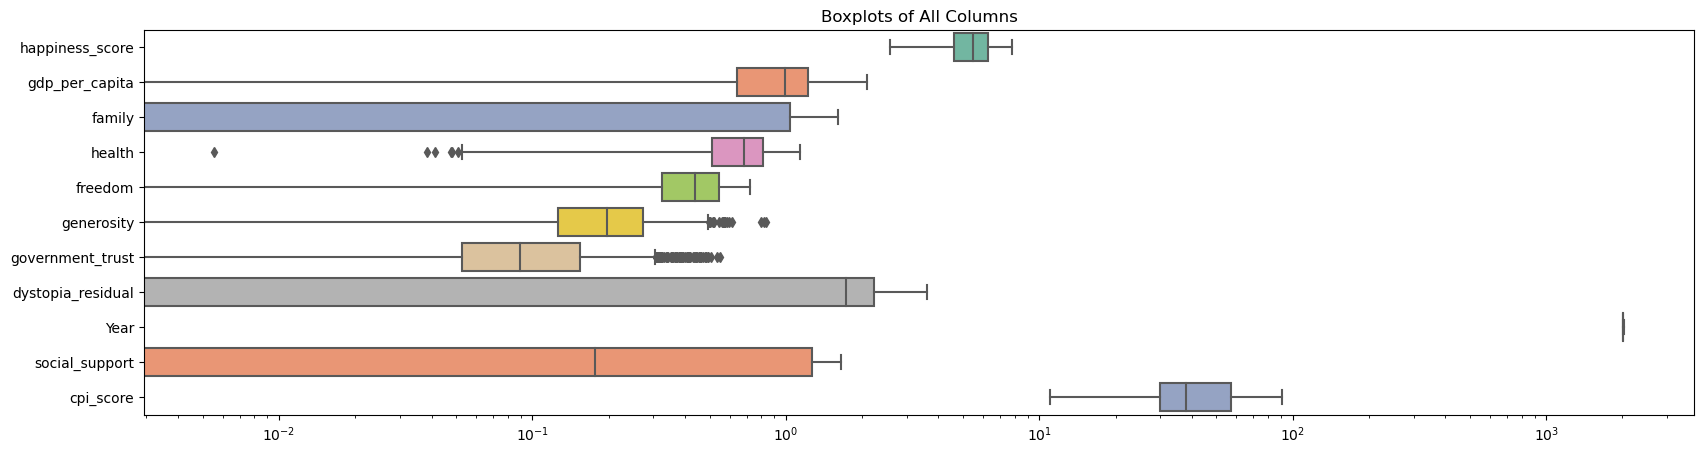

In [4]:
# check outliers
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.xscale('log') 
plt.title('Boxplots of All Columns')
plt.show()

In [5]:
# remove outliers with IQR
def remove_outliers(df):
    # Filter only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_data = df[numeric_cols]

    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = numeric_data.quantile(0.25)
    Q3 = numeric_data.quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound))
    filtered_df = df[~outliers.any(axis=1)]

    return filtered_df
    

In [6]:
# new dataset view
filtered_df = remove_outliers(df)

print("Original DataFrame:")
print(df)
print("\nFiltered DataFrame (without outliers):")
print(filtered_df)

Original DataFrame:
         Country  happiness_score  gdp_per_capita    family    health  \
0         Norway           7.5370        1.616463  1.533524  0.796667   
1        Denmark           7.5220        1.482383  1.551122  0.792566   
2        Iceland           7.5040        1.480633  1.610574  0.833552   
3    Switzerland           7.4940        1.564980  1.516912  0.858131   
4        Finland           7.4690        1.443572  1.540247  0.809158   
..           ...              ...             ...       ...       ...   
787     Botswana           3.4789        0.997549  0.000000  0.494102   
788     Tanzania           3.4762        0.457163  0.000000  0.442678   
789       Rwanda           3.3123        0.343243  0.000000  0.572383   
790     Zimbabwe           3.2992        0.425564  0.000000  0.375038   
791  Afghanistan           2.5669        0.300706  0.000000  0.266052   

      freedom  generosity  government_trust  dystopia_residual continent  \
0    0.635423    0.362012  

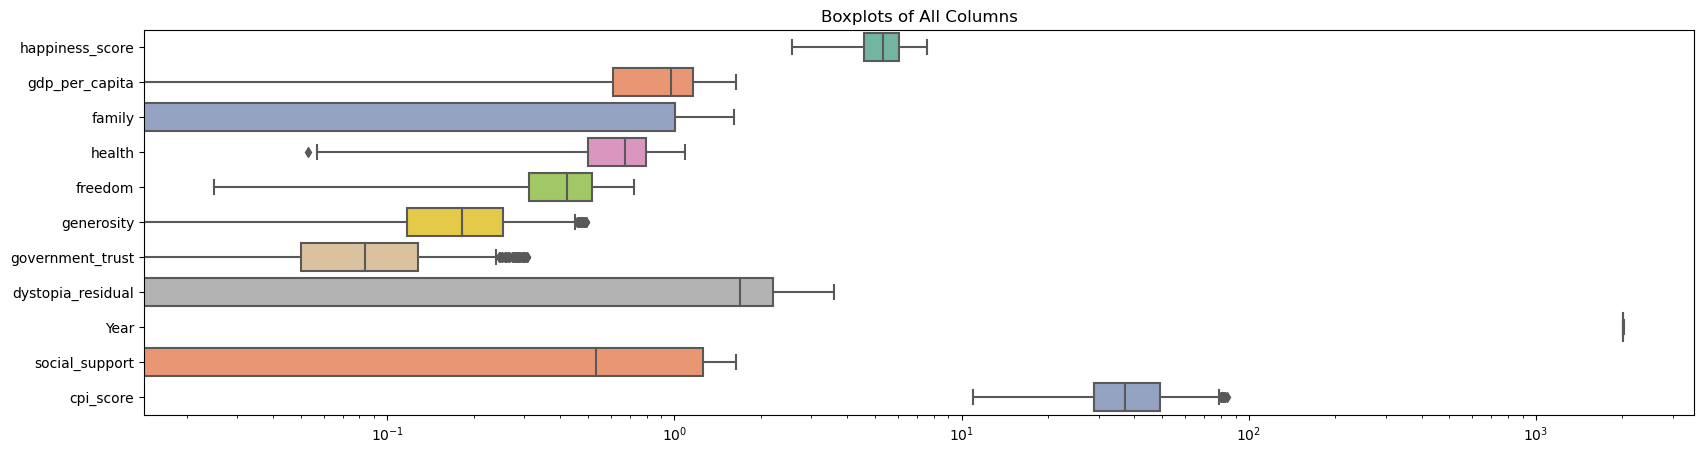

In [7]:
# get new dataset boxplot
plt.figure(figsize=(20, 5))
sns.boxplot(data=filtered_df, orient='h', palette='Set2')
plt.xscale('log') 
plt.title('Boxplots of All Columns')
plt.show()

In [10]:
# columns names
filtered_df.columns

Index(['Country', 'happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 'government_trust', 'dystopia_residual',
       'continent', 'Year', 'social_support', 'cpi_score'],
      dtype='object')

In [8]:
# check duplicate values
duplicates = filtered_df.duplicated().sum()
duplicates

0

In [9]:
# check non - values
print(filtered_df.info())
print(filtered_df.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 2 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            688 non-null    object 
 1   happiness_score    688 non-null    float64
 2   gdp_per_capita     688 non-null    float64
 3   family             688 non-null    float64
 4   health             688 non-null    float64
 5   freedom            688 non-null    float64
 6   generosity         688 non-null    float64
 7   government_trust   688 non-null    float64
 8   dystopia_residual  688 non-null    float64
 9   continent          688 non-null    object 
 10  Year               688 non-null    int64  
 11  social_support     688 non-null    float64
 12  cpi_score          688 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 75.2+ KB
None
Index(['Country', 'happiness_score', 'gdp_per_capita', 'family', 'health',
       'freedom', 'generosity', 

In [11]:
# exploratory data analysis for selected fields
filtered_df.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,5.336017,0.891672,0.481718,0.633787,0.407443,0.193130,0.097454,1.353302,2017.502907,0.616018,40.840116
std,1.022603,0.364710,0.542082,0.218668,0.143039,0.103417,0.067045,1.081733,1.704517,0.632076,16.290772
min,2.566900,0.000000,0.000000,0.053000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.560275,0.608691,0.000000,0.500213,0.310303,0.116865,0.050000,0.000000,2016.000000,0.000000,29.000000
50%,5.337500,0.974690,0.000000,0.670130,0.422920,0.182344,0.083587,1.696714,2018.000000,0.533684,37.000000
75%,6.070250,1.162577,1.005370,0.796035,0.516000,0.253070,0.128000,2.209258,2019.000000,1.258272,49.000000
max,7.561000,1.632952,1.610574,1.088000,0.724000,0.492774,0.306000,3.602140,2020.000000,1.644000,84.000000


# Multiple linear regression

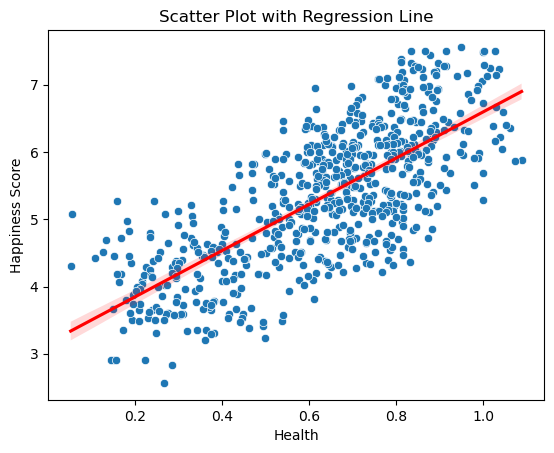

In [12]:
# happiness score and health scatter with regression line
sns.scatterplot(x='health', y='happiness_score', data=filtered_df)
sns.regplot(x='health', y='happiness_score', data=filtered_df, scatter=False, color='red')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('Health')
plt.ylabel('Happiness Score')
plt.show()


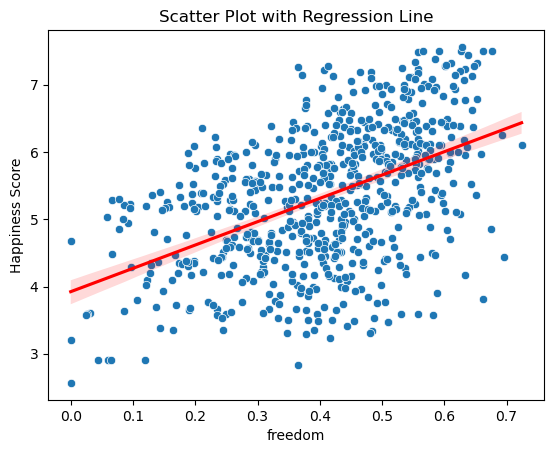

In [13]:
# happiness score and freedom scatter with regression line
sns.scatterplot(x='freedom', y='happiness_score', data=filtered_df)
sns.regplot(x='freedom', y='happiness_score', data=filtered_df, scatter=False, color='red')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('freedom')
plt.ylabel('Happiness Score')
plt.show()

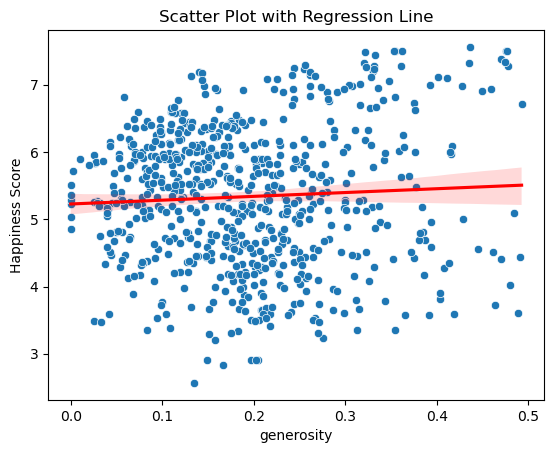

In [14]:
# happiness score and generosity scatter with regression line
sns.scatterplot(x='generosity', y='happiness_score', data=filtered_df)
sns.regplot(x='generosity', y='happiness_score', data=filtered_df, scatter=False, color='red')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('generosity')
plt.ylabel('Happiness Score')
plt.show()


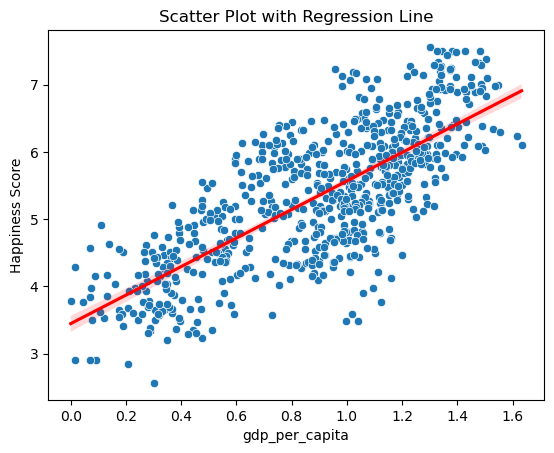

In [19]:
# happiness score and gdp per capita scatter with regression line
sns.scatterplot(x='gdp_per_capita', y='happiness_score', data=filtered_df)
sns.regplot(x='gdp_per_capita', y='happiness_score', data=filtered_df, scatter=False, color='red')

plt.title('Scatter Plot with Regression Line')
plt.xlabel('gdp_per_capita')
plt.ylabel('Happiness Score')
plt.show()

In [20]:
# multiple linear regresion result
X = np.column_stack((filtered_df['health'], filtered_df['government_trust'], filtered_df['family'],
                     filtered_df['gdp_per_capita'], filtered_df['generosity'],filtered_df['freedom']))
X_with_intercept = sm.add_constant(X)

# Create the OLS model using the formula
formula = 'happiness_score ~ health + government_trust + family + gdp_per_capita + generosity + freedom'
model = sm.OLS.from_formula(formula, data=filtered_df)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     293.0
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          6.64e-185
Time:                        11:20:41   Log-Likelihood:                -552.23
No. Observations:                 688   AIC:                             1118.
Df Residuals:                     681   BIC:                             1150.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.2759      0.086  

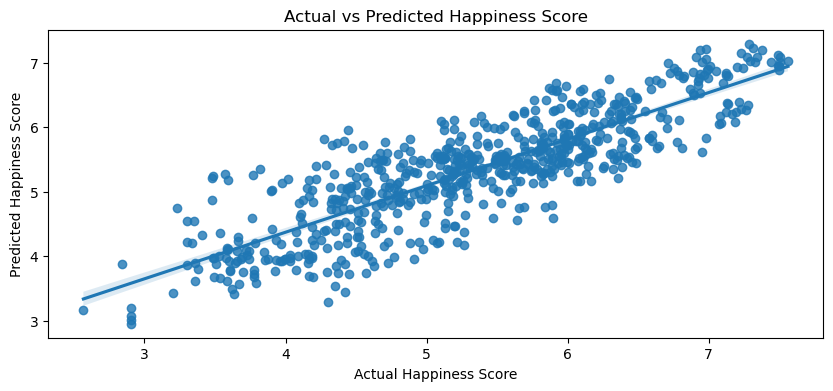

In [21]:
# actual and predicted happiness score scatter plot
X = np.column_stack((filtered_df['health'], filtered_df['government_trust'], 
                     filtered_df['family'], filtered_df['gdp_per_capita'], filtered_df['generosity'], filtered_df['freedom']))
X_with_intercept = sm.add_constant(X)
model = sm.OLS(filtered_df['happiness_score'], X_with_intercept)
results = model.fit()
predicted_values = results.predict(X_with_intercept)

# Scatter plot with regression line
plt.figure(figsize=(10, 4))
sns.regplot(x=filtered_df['happiness_score'], y=predicted_values)
plt.title('Actual vs Predicted Happiness Score')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.show()

# ANOVA

In [22]:
# continent and freedom anova result
anova_result = f_oneway(
    filtered_df[filtered_df['continent'] == 'Asia']['freedom'],
    filtered_df[filtered_df['continent'] == 'Europe']['freedom'],
    filtered_df[filtered_df['continent'] == 'Africa']['freedom'],
    filtered_df[filtered_df['continent'] == 'North America']['freedom'],
    filtered_df[filtered_df['continent'] == 'South America']['freedom'],
    filtered_df[filtered_df['continent'] == 'Australia']['freedom'])
print("ANOVA Results:")
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

ANOVA Results:
F-statistic: 12.78965919556293
P-value: 6.675840729991192e-12


In [23]:
# one way anova result
tukey_result = pairwise_tukeyhsd(filtered_df['freedom'], filtered_df['continent'])
print("\nTukey's HSD Results:")
print(tukey_result)


Tukey's HSD Results:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
       Africa          Asia    0.071    0.0  0.0302 0.1118   True
       Africa     Australia    0.245 0.0272  0.0166 0.4735   True
       Africa        Europe   0.0314 0.2559 -0.0101 0.0729  False
       Africa North America   0.1482 0.0015  0.0393 0.2571   True
       Africa South America   0.1052    0.0  0.0588 0.1516   True
         Asia     Australia    0.174 0.2489 -0.0542 0.4023  False
         Asia        Europe  -0.0396 0.0605 -0.0802  0.001  False
         Asia North America   0.0772 0.3252 -0.0314 0.1858  False
         Asia South America   0.0342 0.2666 -0.0114 0.0798  False
    Australia        Europe  -0.2136 0.0819  -0.442 0.0147  False
    Australia North America  -0.0968 0.8778 -0.3464 0.1528  False
    Australia South America  -0.1398 0.5039 -0.3691 0.

In [24]:
# Eta squared result
eta_squared = anova_result.statistic / (anova_result.statistic + (len(filtered_df) - 5))
print("\nEta-squared (Effect Size):", eta_squared)


Eta-squared (Effect Size): 0.01838150226370092


# Correlation

In [25]:
# gdp per capita and health correlation value 
correlation_coefficient, p_value = pearsonr(filtered_df['gdp_per_capita'], filtered_df['health'])
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)


Pearson Correlation Coefficient: 0.7627193506935926
P-value: 5.709614849475764e-132


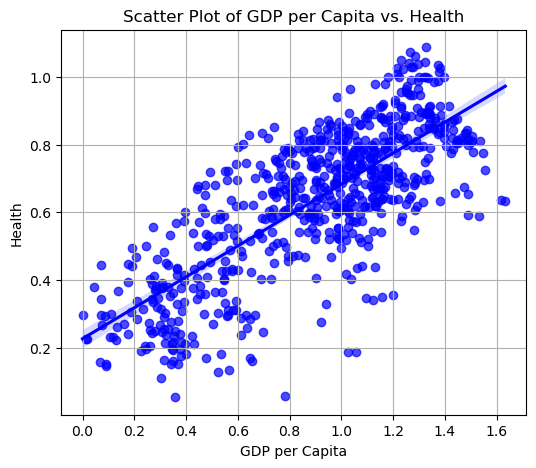

In [26]:
# visualize with sactter plot
plt.figure(figsize=(6, 5))
sns.regplot(x='gdp_per_capita', y='health', data=filtered_df, color='blue', scatter_kws={'alpha':0.7})
plt.title('Scatter Plot of GDP per Capita vs. Health')
plt.xlabel('GDP per Capita')
plt.ylabel('Health')
plt.grid(True)
plt.show()

In [49]:
# gdp per capita and generosity correlation value 
correlation_coefficient, p_value = pearsonr(filtered_df['gdp_per_capita'], filtered_df['generosity'])
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Pearson Correlation Coefficient: -0.13601292016206507
P-value: 0.0003465818985900956


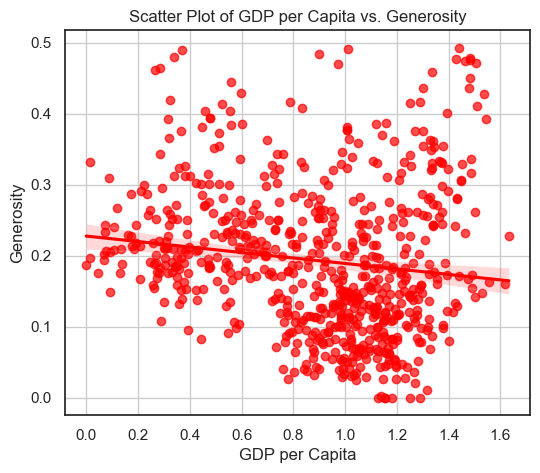

In [50]:
# visualize with sactter plot
plt.figure(figsize=(6,5))
sns.regplot(x='gdp_per_capita', y='generosity', data=filtered_df, color='red', scatter_kws={'alpha':0.7})
plt.title('Scatter Plot of GDP per Capita vs. Generosity')
plt.xlabel('GDP per Capita')
plt.ylabel('Generosity')
plt.grid(True)
plt.show()

# Explorotary visualization

Text(0.5, 1.0, 'Happiness Score by Continent')

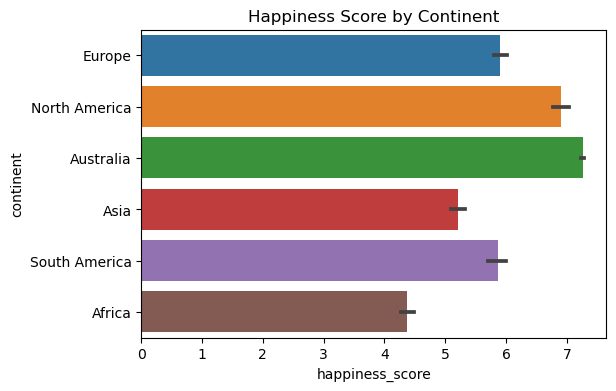

In [27]:
#Happiness score by Continent
plt.figure(figsize=(6,4))
sns.barplot(data=filtered_df,y='continent', x='happiness_score')
plt.title('Happiness Score by Continent')

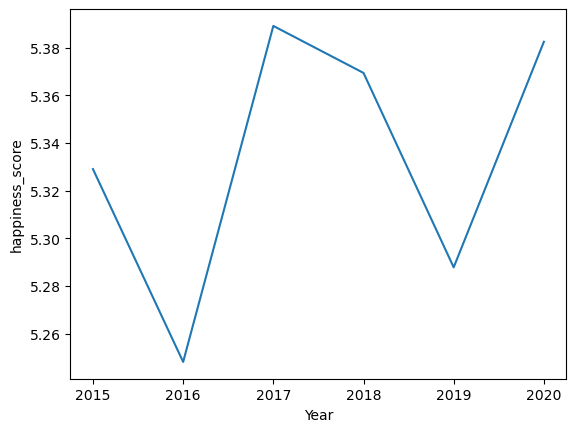

In [28]:
#Happiness score by Year
sns.lineplot(data=filtered_df.reset_index(), x='Year', y='happiness_score',err_style=None)
plt.show()


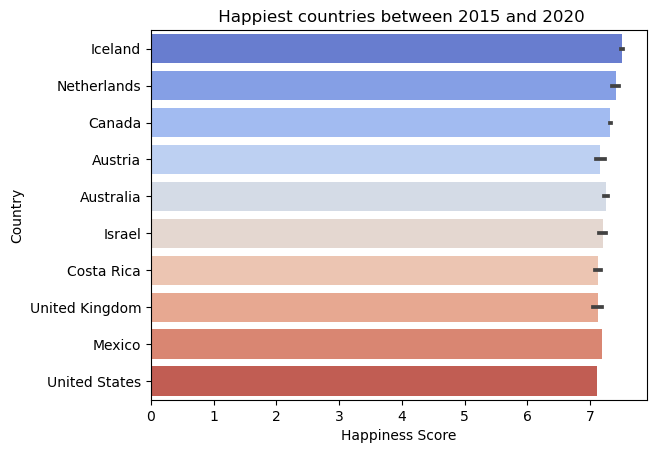

In [29]:
# Find happiest country
df_happiest = filtered_df[(filtered_df["happiness_score"] > 7.0) & (filtered_df["Year"] <= 2020)].copy()
df_happiest.sort_values(by='happiness_score', ascending=False, inplace=True)
sns.barplot(x="happiness_score", y="Country", data=df_happiest, palette="coolwarm")
plt.title(" Happiest countries between 2015 and 2020")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()


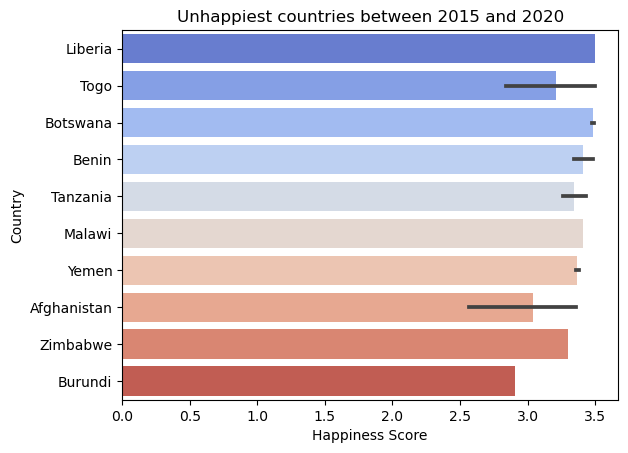

In [30]:
# Find unhappiest country
df_unhappiest = filtered_df[(filtered_df["happiness_score"] < 3.5) & (filtered_df["Year"] <= 2020)].copy()
df_unhappiest.sort_values(by='happiness_score', ascending=False, inplace=True)
sns.barplot(x="happiness_score", y="Country", data=df_unhappiest, palette="coolwarm")
plt.title("Unhappiest countries between 2015 and 2020")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

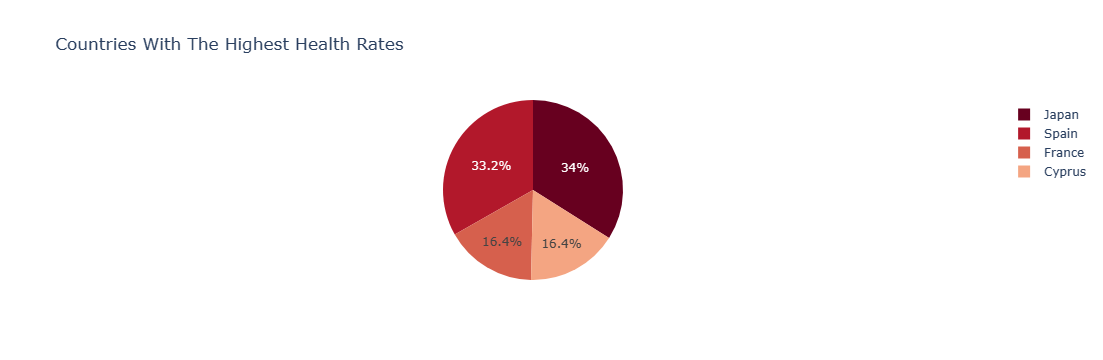

In [54]:
# find best helath rate country
fig = px.pie(filtered_df.nlargest(6, 'health'), values='health', names='Country', title='Countries With The Highest Health Rates',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()


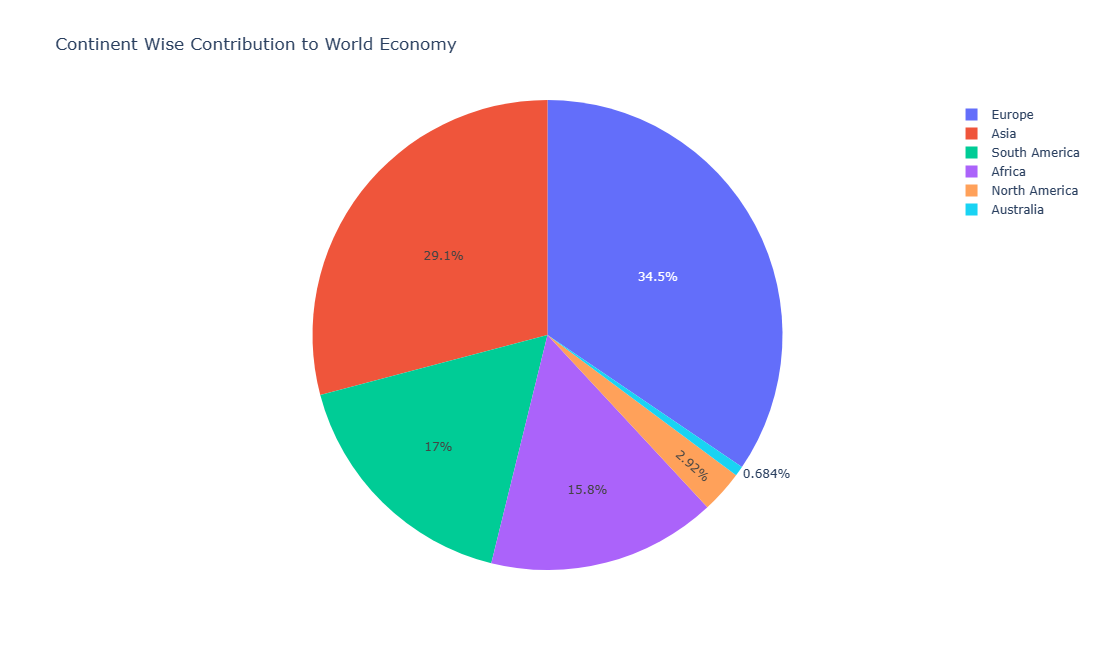

In [32]:
# find continet contribution to warld economy
fig = px.pie(filtered_df, values='gdp_per_capita', names='continent', title='Continent Wise Contribution to World Economy',height=650)
fig.show()

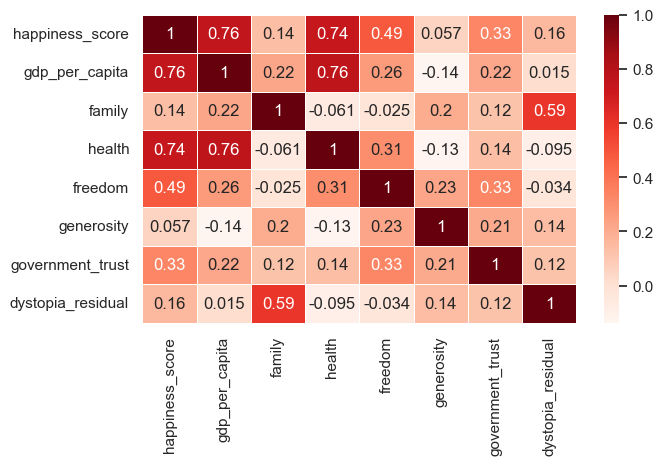

In [53]:
# correlation heat map
columns_list = ['happiness_score', 'gdp_per_capita', 'family', 'health', 'freedom', 'generosity', 'government_trust', 'dystopia_residual']

corr_matrix = filtered_df[columns_list].corr()

# Create a heatmap with a red colormap
sns.set(style="white")  # Optional, sets the style
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap="Reds", linewidths=.5)
plt.show()